In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

In [16]:
df_mushroom_dataset = pd.read_csv('mushroom_cleaned.csv')

In [17]:
df_mushroom_dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [18]:
df_mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [19]:
print(df_mushroom_dataset.describe())

       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000      0.027372      0.000000

## Scaling the data

In [20]:
X = df_mushroom_dataset.drop(columns=['class'])  # Features (all columns except 'class')
y = df_mushroom_dataset['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Divide data to train and tests

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## kNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("kNN Accuracy: ", accuracy_score(y_test, y_pred_knn))

kNN Accuracy:  0.9895438141945035


## SVM

In [23]:
from sklearn.svm import SVC

# Mallin koulutus ja ennustus
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Tarkkuus
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9080225779587304


## Confusion matrix

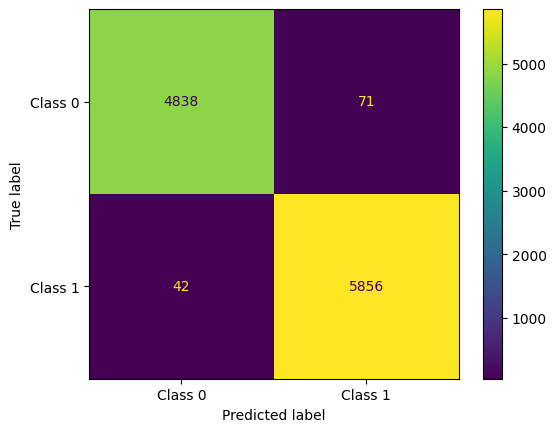

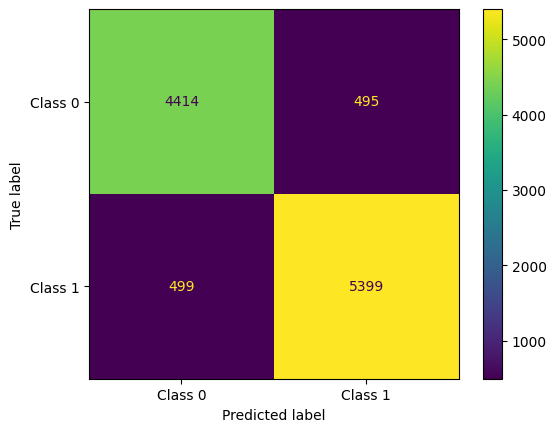

In [24]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

ConfusionMatrixDisplay(cm_knn, display_labels=["Class 0", "Class 1"]).plot()
ConfusionMatrixDisplay(cm_svm, display_labels=["Class 0", "Class 1"]).plot()

## kNN results

In [25]:
print("kNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



## SVM results

In [26]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4909
           1       0.92      0.92      0.92      5898

    accuracy                           0.91     10807
   macro avg       0.91      0.91      0.91     10807
weighted avg       0.91      0.91      0.91     10807

